# **1. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, classification_report

# **2. Memuat Dataset dari Hasil Clustering**

Memuat dataset hasil clustering dari file CSV ke dalam variabel DataFrame.

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/syafiqirz/Bank-Fraud-Transaction-Clustering-Classification/refs/heads/main/clustered_fraud_transaction.csv')
df

,TransactionType,TransactionDuration,TimeSinceLastTransaction,TransactionPerDay,LoginAttempts,Cluster
0,Debit,81.0,49477134.0,1.0,Low,0
1,Debit,141.0,42823516.0,1.0,Low,0
2,Debit,56.0,41694656.0,1.0,Low,0
3,Debit,25.0,47403415.0,1.0,Low,0
4,Credit,198.0,33228915.0,1.0,Low,0
...,...,...,...,...,...,...
2507,Credit,109.0,48178913.0,1.0,Low,0
2508,Debit,177.0,51201294.0,1.0,Low,0
2509,Debit,146.0,38069989.0,1.0,Low,0
2510,Debit,19.0,53452056.0,1.0,Low,0


Memeriksa datatype tiap kolom

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2512 entries, 0 to 2511
Data columns (total 6 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   TransactionType           2512 non-null   object 
 1   TransactionDuration       2512 non-null   float64
 2   TimeSinceLastTransaction  2512 non-null   float64
 3   TransactionPerDay         2512 non-null   float64
 4   LoginAttempts             2512 non-null   object 
 5   Cluster                   2512 non-null   int64  
dtypes: float64(3), int64(1), object(2)
memory usage: 117.9+ KB


Melihat statistik tiap kolom

In [4]:
df.describe(include='all')

,TransactionType,TransactionDuration,TimeSinceLastTransaction,TransactionPerDay,LoginAttempts,Cluster
count,2512,2512.000000,2.512000e+03,2512.000000,2512,2512.000000
unique,2,NaN,NaN,NaN,2,NaN
top,Debit,NaN,NaN,NaN,Low,NaN
freq,1944,NaN,NaN,NaN,2448,NaN
mean,NaN,119.643312,4.211863e+07,1.029459,NaN,0.079618
std,NaN,69.963757,9.191205e+06,0.169122,NaN,0.352539
min,NaN,10.000000,2.657429e+07,1.000000,NaN,0.000000
25%,NaN,63.000000,3.408996e+07,1.000000,NaN,0.000000
50%,NaN,112.500000,4.195566e+07,1.000000,NaN,0.000000
75%,NaN,161.000000,5.016886e+07,1.000000,NaN,0.000000


Memeriksa nilai kosong pada dataset.

In [5]:
df.isna().sum()

,0
TransactionType,0
TransactionDuration,0
TimeSinceLastTransaction,0
TransactionPerDay,0
LoginAttempts,0
Cluster,0


# 2 Data Preprocessing

Preprocessing data yang dilakukan di sini adalah berupa data encoding untuk variabel kategorikal, yaitu fitur TransactionType dan LoginAttempts

In [7]:
TransactionTypeEncoder = LabelEncoder()
df['TransactionType'] = TransactionTypeEncoder.fit_transform(df['TransactionType'])

LoginAttemptsEncoder = LabelEncoder()
df['LoginAttempts'] = LoginAttemptsEncoder.fit_transform(df['LoginAttempts'])

In [8]:
df.describe()

,TransactionType,TransactionDuration,TimeSinceLastTransaction,TransactionPerDay,LoginAttempts,Cluster
count,2512.000000,2512.000000,2.512000e+03,2512.000000,2512.000000,2512.000000
mean,0.773885,119.643312,4.211863e+07,1.029459,0.974522,0.079618
std,0.418398,69.963757,9.191205e+06,0.169122,0.157602,0.352539
min,0.000000,10.000000,2.657429e+07,1.000000,0.000000,0.000000
25%,1.000000,63.000000,3.408996e+07,1.000000,1.000000,0.000000
50%,1.000000,112.500000,4.195566e+07,1.000000,1.000000,0.000000
75%,1.000000,161.000000,5.016886e+07,1.000000,1.000000,0.000000
max,1.000000,300.000000,5.803267e+07,2.000000,1.000000,2.000000


In [10]:
df['Cluster'] = df['Cluster'].astype(str)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2512 entries, 0 to 2511
Data columns (total 6 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   TransactionType           2512 non-null   int64  
 1   TransactionDuration       2512 non-null   float64
 2   TimeSinceLastTransaction  2512 non-null   float64
 3   TransactionPerDay         2512 non-null   float64
 4   LoginAttempts             2512 non-null   int64  
 5   Cluster                   2512 non-null   object 
dtypes: float64(3), int64(2), object(1)
memory usage: 117.9+ KB


In [11]:
df.describe(include='all')

,TransactionType,TransactionDuration,TimeSinceLastTransaction,TransactionPerDay,LoginAttempts,Cluster
count,2512.000000,2512.000000,2.512000e+03,2512.000000,2512.000000,2512
unique,NaN,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,NaN,0
freq,NaN,NaN,NaN,NaN,NaN,2376
mean,0.773885,119.643312,4.211863e+07,1.029459,0.974522,NaN
std,0.418398,69.963757,9.191205e+06,0.169122,0.157602,NaN
min,0.000000,10.000000,2.657429e+07,1.000000,0.000000,NaN
25%,1.000000,63.000000,3.408996e+07,1.000000,1.000000,NaN
50%,1.000000,112.500000,4.195566e+07,1.000000,1.000000,NaN
75%,1.000000,161.000000,5.016886e+07,1.000000,1.000000,NaN


# **3. Data Splitting**

Tahap Data Splitting bertujuan untuk memisahkan dataset menjadi dua bagian: data latih (training set) dan data uji (test set). Sebelum dilakukan splitting, data numerikal akan dilakukan minmax scaling untuk tujuan normalisaisi.

In [12]:
minmax_scaler = MinMaxScaler()

numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns
df[numerical_columns] = minmax_scaler.fit_transform(df[numerical_columns])

In [13]:
df.describe(include='all')

,TransactionType,TransactionDuration,TimeSinceLastTransaction,TransactionPerDay,LoginAttempts,Cluster
count,2512.000000,2512.000000,2512.000000,2512.000000,2512.000000,2512
unique,NaN,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,NaN,0
freq,NaN,NaN,NaN,NaN,NaN,2376
mean,0.773885,0.378080,0.494124,0.029459,0.974522,NaN
std,0.418398,0.241254,0.292170,0.169122,0.157602,NaN
min,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,1.000000,0.182759,0.238908,0.000000,1.000000,NaN
50%,1.000000,0.353448,0.488944,0.000000,1.000000,NaN
75%,1.000000,0.520690,0.750025,0.000000,1.000000,NaN


In [14]:
# Pisahkan fitur (X) dan target (y)
X = df.drop(columns=['Cluster'])
y = df['Cluster']

# Split data menjadi set pelatihan dan set uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Tampilkan bentuk set pelatihan dan set uji untuk memastikan split
print(f"Training set shape: X_train={X_train.shape}, y_train={y_train.shape}")
print(f"Test set shape: X_test={X_test.shape}, y_test={y_test.shape}")

Training set shape: X_train=(2009, 5), y_train=(2009,)
Test set shape: X_test=(503, 5), y_test=(503,)


# **4. Membangun Model Klasifikasi**


## **a. Membangun Model Klasifikasi**

Setelah memilih algoritma klasifikasi yang sesuai, langkah selanjutnya adalah melatih model menggunakan data latih.

Berikut adalah rekomendasi tahapannya.
1. Pilih algoritma klasifikasi yang sesuai, seperti Logistic Regression, Decision Tree, Random Forest, atau K-Nearest Neighbors (KNN).
2. Latih model menggunakan data latih.

In [15]:
knn = KNeighborsClassifier().fit(X_train, y_train)
dt = DecisionTreeClassifier().fit(X_train, y_train)
rf = RandomForestClassifier().fit(X_train, y_train)
svm = SVC().fit(X_train, y_train)
nb = GaussianNB().fit(X_train, y_train)

Tulis narasi atau penjelasan algoritma yang Anda gunakan.

## **b. Evaluasi Model Klasifikasi**

### **Evaluasi dengan Dataset Latih**

==== KNN Classifier ====

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1893
           1       1.00      1.00      1.00        61
           2       1.00      1.00      1.00        55

    accuracy                           1.00      2009
   macro avg       1.00      1.00      1.00      2009
weighted avg       1.00      1.00      1.00      2009



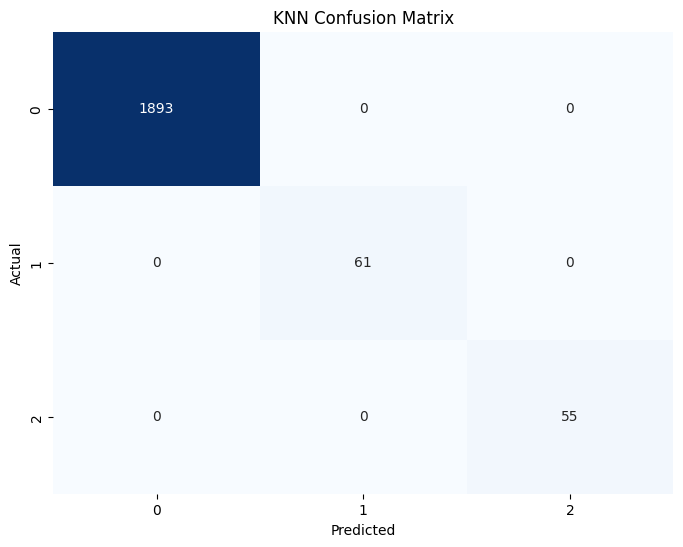

----------------------------------------------------------------------------------------------------

==== Decision Tree Classifier ====

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1893
           1       1.00      1.00      1.00        61
           2       1.00      1.00      1.00        55

    accuracy                           1.00      2009
   macro avg       1.00      1.00      1.00      2009
weighted avg       1.00      1.00      1.00      2009



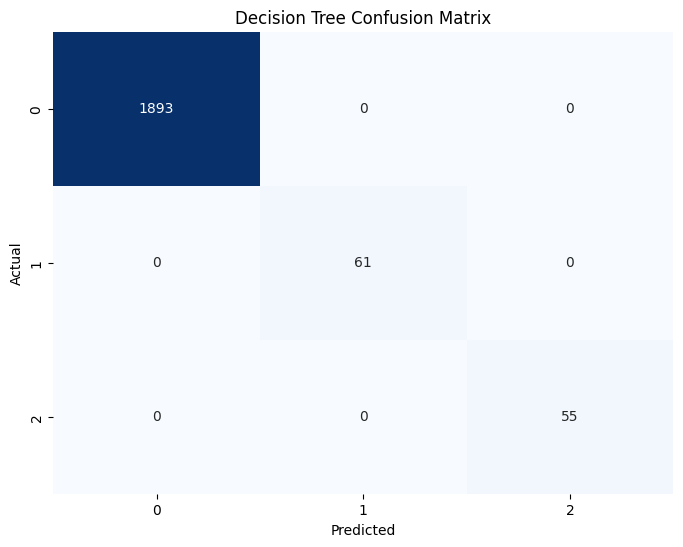

----------------------------------------------------------------------------------------------------

==== Random Forest Classifier ====

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1893
           1       1.00      1.00      1.00        61
           2       1.00      1.00      1.00        55

    accuracy                           1.00      2009
   macro avg       1.00      1.00      1.00      2009
weighted avg       1.00      1.00      1.00      2009



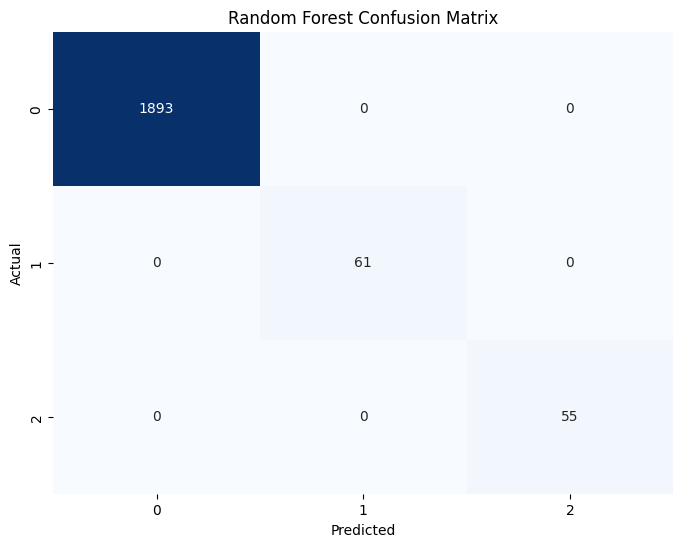

----------------------------------------------------------------------------------------------------

==== SVM Classifier ====

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1893
           1       1.00      1.00      1.00        61
           2       1.00      1.00      1.00        55

    accuracy                           1.00      2009
   macro avg       1.00      1.00      1.00      2009
weighted avg       1.00      1.00      1.00      2009



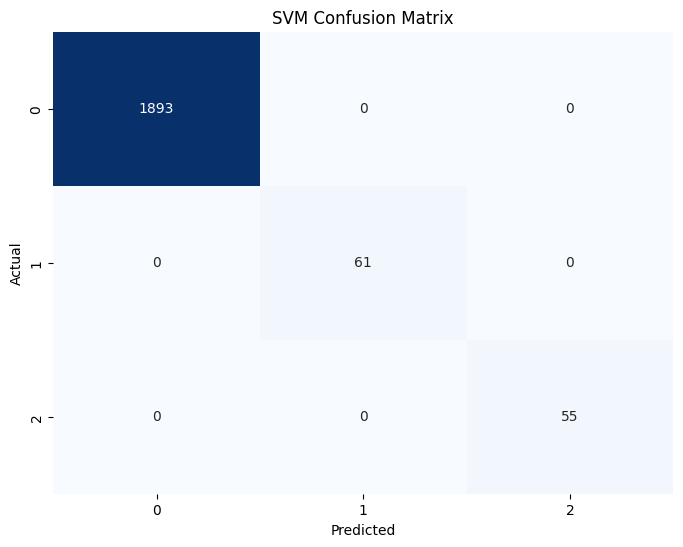

----------------------------------------------------------------------------------------------------

==== Gaussian Naive Bayes Classifier ====

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1893
           1       1.00      1.00      1.00        61
           2       1.00      1.00      1.00        55

    accuracy                           1.00      2009
   macro avg       1.00      1.00      1.00      2009
weighted avg       1.00      1.00      1.00      2009



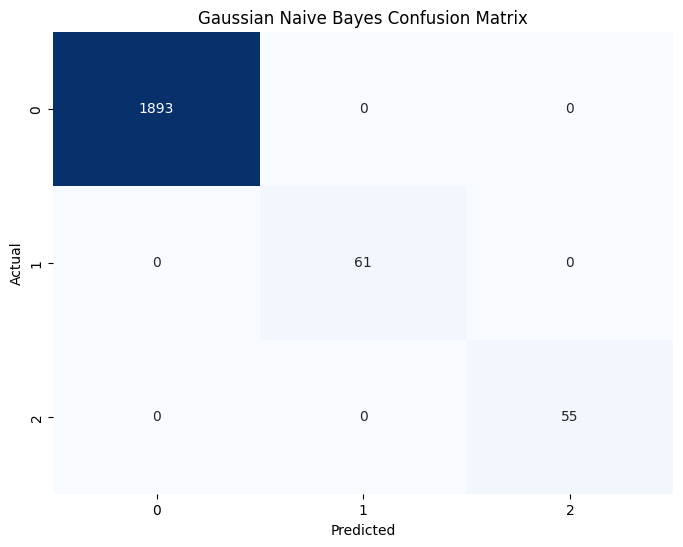

----------------------------------------------------------------------------------------------------



In [16]:
models = {
    "KNN": knn,
    "Decision Tree": dt,
    "Random Forest": rf,
    "SVM": svm,
    "Gaussian Naive Bayes": nb
}

for name, model in models.items():
    y_pred = model.predict(X_train)
    cm = confusion_matrix(y_train, y_pred)
    report = classification_report(y_train, y_pred)

    print(f"==== {name} Classifier ====")
    print("\nClassification Report:")
    print(report)

    # Visualisasi Confusion Matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(f'{name} Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

    print("-" * 100 + "\n")

## **Evaluasi dengan Dataset Uji**

==== KNN Classifier ====

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       483
           1       1.00      1.00      1.00        11
           2       1.00      1.00      1.00         9

    accuracy                           1.00       503
   macro avg       1.00      1.00      1.00       503
weighted avg       1.00      1.00      1.00       503



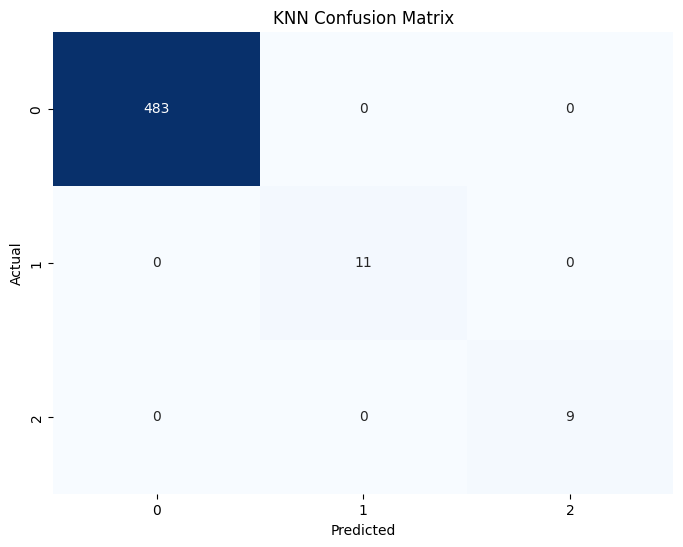

----------------------------------------------------------------------------------------------------

==== Decision Tree Classifier ====

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       483
           1       1.00      1.00      1.00        11
           2       1.00      1.00      1.00         9

    accuracy                           1.00       503
   macro avg       1.00      1.00      1.00       503
weighted avg       1.00      1.00      1.00       503



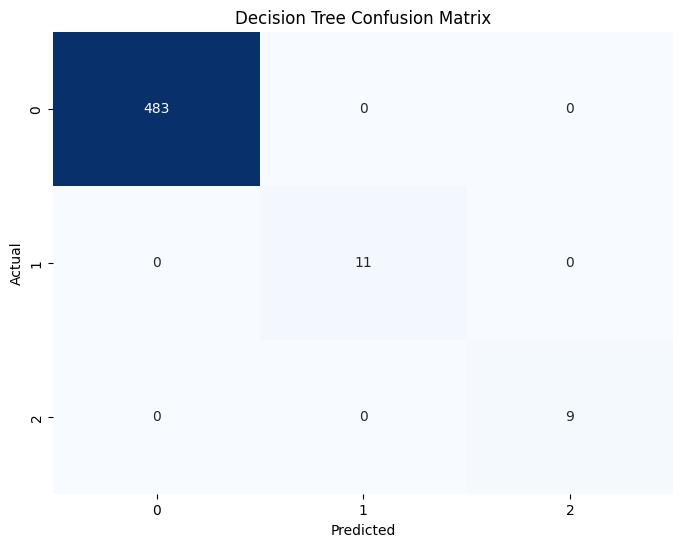

----------------------------------------------------------------------------------------------------

==== Random Forest Classifier ====

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       483
           1       1.00      1.00      1.00        11
           2       1.00      1.00      1.00         9

    accuracy                           1.00       503
   macro avg       1.00      1.00      1.00       503
weighted avg       1.00      1.00      1.00       503



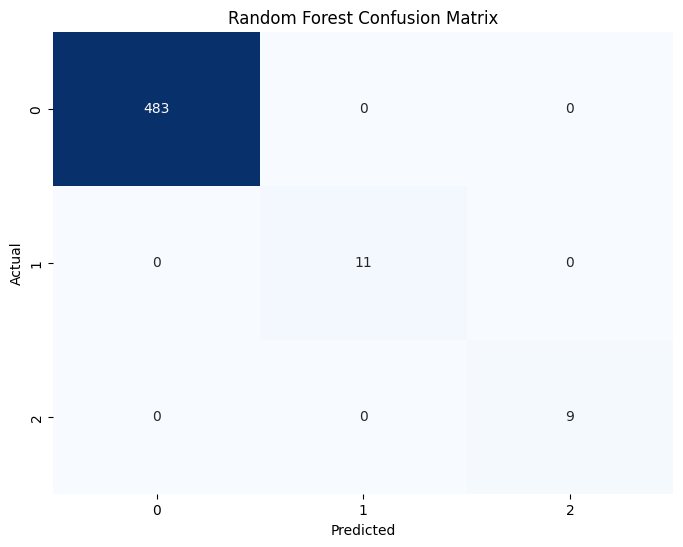

----------------------------------------------------------------------------------------------------

==== SVM Classifier ====

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       483
           1       1.00      1.00      1.00        11
           2       1.00      1.00      1.00         9

    accuracy                           1.00       503
   macro avg       1.00      1.00      1.00       503
weighted avg       1.00      1.00      1.00       503



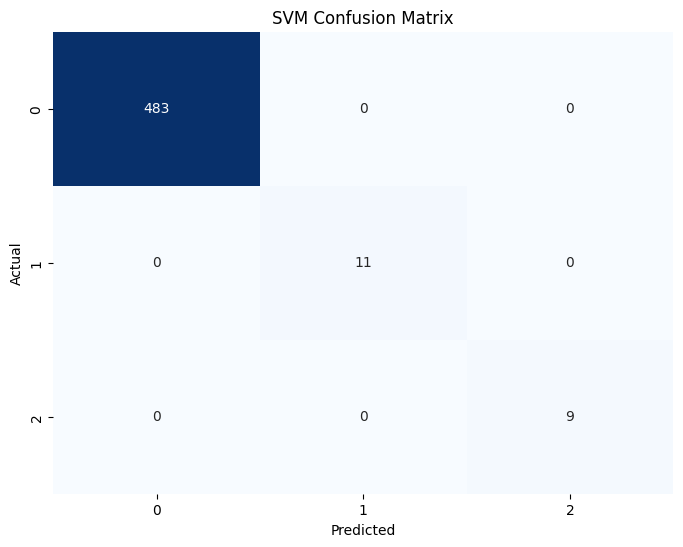

----------------------------------------------------------------------------------------------------

==== Gaussian Naive Bayes Classifier ====

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       483
           1       1.00      1.00      1.00        11
           2       1.00      1.00      1.00         9

    accuracy                           1.00       503
   macro avg       1.00      1.00      1.00       503
weighted avg       1.00      1.00      1.00       503



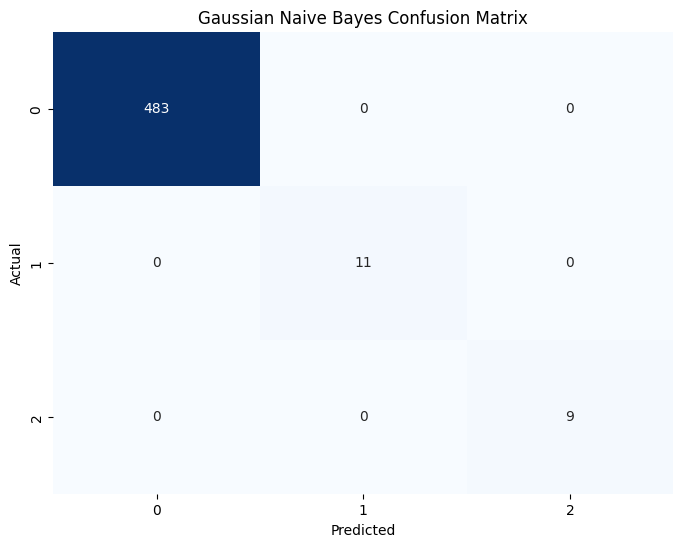

----------------------------------------------------------------------------------------------------



In [17]:
models = {
    "KNN": knn,
    "Decision Tree": dt,
    "Random Forest": rf,
    "SVM": svm,
    "Gaussian Naive Bayes": nb
}

for name, model in models.items():
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    report = classification_report(y_test, y_pred)

    print(f"==== {name} Classifier ====")
    print("\nClassification Report:")
    print(report)

    # Visualisasi Confusion Matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(f'{name} Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

    print("-" * 100 + "\n")

## **c. Tuning Model Klasifikasi (Optional)**

Meskipun semua algoritma yang digunakan menunjukkan akurasi 1.00, yang mengindikasikan kinerja sempurna pada data uji. Akurasi sempurna sering kali menjadi tanda overfitting, di mana model mempelajari data latih terlalu baik dan gagal menggeneralisasi ke data baru.

Namun, karena semua model menunjukkan kinerja yang sama, tuning mungkin tidak menghasilkan perbedaan yang signifikan dalam hal akurasi.

## **d. Analisis Hasil Evaluasi Model Klasifikasi**

Berdasarkan hasil yang sudah ditampilkan, seluruh model (KNN, Decision Tree, Random Forest, SVM, dan GaussianNB) menghasilkan akurasi sempurna (100%) pada data latih (X_train) dan data uji (X_test), dengan precision, recall, dan f1-score = 1.00 untuk semua kelas. Namun ini adalah sinyal yang sangat mencurigakan dan mengarah pada kemungkinan besar terjadi data leakage atau masalah lain dalam proses pelatihan dan pengujian.

Analisis & Potensi Masalah
1. Overfitting atau Data Leakage
Skor sempurna di semua model biasanya tidak realistis dalam situasi dunia nyata.
Jika data latih (X_train) dan data uji (X_test) tidak dipisahkan dengan benar (misal: urut atau ada overlap), maka model akan "belajar" dari data yang seharusnya tidak diketahui, ini disebut data leakage. Jika fitur terlalu mudah menebak label (contoh: ada fitur target tersembunyi), ini juga membuat model overfit secara tidak sah.

2. Model Overfit pada Noise atau Label
Jika dataset sangat terstruktur (misal: data hasil encoding dari label atau ada fitur yang identik dengan label), maka model hanya menghafal, bukan generalisasi.



